## Данные
[Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile). В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [23]:
import numpy as np
import pandas as pd
%matplotlib inline
pd.set_option('display.max_columns',100)
# X_raw = pd.read_csv("cars.csv", header=None, na_values=["?"])
X_raw = pd.read_csv("cars.csv", header=None).fillna('?')

In [24]:
original_data = X_raw.head()
original_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Предобработка данных
Предобработка данных важна при применении любых методов машинного обучения, а в особенности для линейных моделей. В sklearn предобработку удобно делать с помощью модуля [preprocessing](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

In [25]:
from sklearn import preprocessing

### Преобразование нечисловых признаков
Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась вещественная матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам. 

__Пример:__ некоторые признаки могут задаваться целочисленными хешами или id, однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Это пример категориального признака, принимающего значения из неупорядоченного конечного множества $K$. К таким признакам обычно применяют [one-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) (вместо одного признака создают $K$ бинарных признаков - по одному на каждое возможное значение исходного признака). В sklearn это можно сделать следующим образом:

In [26]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (X_raw.dtypes == "object").values # категориальные признаки имеют тип "object"
cat_features_mask

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True])

In [27]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
# Обработаем вещественные признаки: разобьем на категории
X_raw[1].value_counts()

?      41
161    11
91      8
150     7
128     6
134     6
104     6
94      5
102     5
74      5
85      5
65      5
103     5
95      5
168     5
106     4
148     4
93      4
122     4
118     4
115     3
125     3
83      3
137     3
154     3
101     3
192     2
158     2
113     2
81      2
188     2
87      2
197     2
110     2
145     2
89      2
108     2
119     2
194     2
129     2
153     2
164     2
256     1
78      1
98      1
186     1
121     1
142     1
231     1
90      1
107     1
77      1
Name: 1, dtype: int64

(array([40., 45., 40., 80.]),
 array([ 0.  , 12.75, 25.5 , 38.25, 51.  ]),
 <a list of 4 Patch objects>)

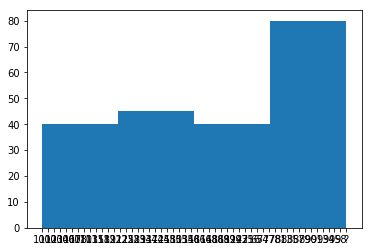

In [32]:
import matplotlib.pyplot as plt
plt.hist(X_raw[1], bins=4)
'''
TODO: Прописать пороги в X_raw в столбце 1. Разбить по значениям. Если '?', то значение - 0.
'''

In [98]:
# Первая строчка маски, как пд.датафрейм
a = pd.DataFrame(cat_features_mask.reshape(1, 26))
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,False,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True,False,True,True,True,False,True,True,False,False,True


In [99]:
# кодирование категорий-строк натуральными числами
label_enc = preprocessing.LabelEncoder()
for feature in X_raw.columns[cat_features_mask]: 
    X_raw[feature] = label_enc.fit_transform(X_raw[feature])

In [101]:
coded_data = X_raw.head()
coded_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,51,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,5,10,21,27,31
1,3,51,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,5,10,21,27,50
2,1,51,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,1,27,9.0,20,10,19,26,50
3,2,27,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,13,24,10.0,2,16,24,30,36
4,2,27,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,13,24,8.0,8,16,18,22,61


In [102]:
original_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [66]:
# применение one-hot encoding
## Что это? Комментарий или задание?

In [103]:
print(X_cat_pd.shape)
X_cat_pd.head()
## Что это? Откуда взялась переменная ''X_cat_pd''? 
## На этом месте у меня падает код:
## NameError: name 'X_cat_pd' is not defined

NameError: name 'X_cat_pd' is not defined

Следует заметить, что в новой матрице очень много нулевых значений. 
Чтобы не хранить их в памяти, можно задать параметр OneHotEncoder(sparse = True), и метод fit_transform вернет [разреженную матрицу](http://docs.scipy.org/doc/scipy/reference/sparse.html), в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов sklearn умеют работать с разреженными матрицами.

In [ ]:
# В какой новой матрице?

### Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет исключение при попытке передать такую матрицу в функцию обучения модели. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:
* заполнить средними (mean, median);
* предсказывать пропущенные значения по непропущенным.

Последний вариант сложный и применяется редко. Замена пропусков средними в вещественных признаках:

In [104]:
# тут код заполнения пропусков средним .fillna()
## Тут нужно что-то написать? Если да, то что?

Всегда нужно осознавать, случайны ли пропуски в каком-то признаке. Иногда факт отсутствия информации о значении признака может сам быть важным признаком, который необходимо добавить к другим признакам.

__Пример:__ предсказание возраста пользователя по данным с его телефона. Поскольку люди старшего возраста чаще пользуются простыми телефонами, факт отсутствия каких-то данных (например, истории посещенных интернет-страниц), скорее всего, будет хорошим признаком.

Для категориальных признаков рекомендуется создавать отдельную категорию, соответствующую пропущенному значению. В наши данных пропусков в категориальных признаках нет.

In [105]:
# проверка пропусков в категориальных признаках
## Это задание?

### Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу.  Это важно по нескольким причинам:
* ускорение обучения модели
* улучшение численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем чисел с плавающей точкой больше, чем с области больших чисел)
* для линейных моделей: интерпретация весов при признаках как меры их значимости.

Популярный способ масштабирования - нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение. Реализация в sklearn (нормировать бинарные признаки не нужно):

In [106]:
normalizer = preprocessing.StandardScaler()
 = normalizer.fit_transform(X_no_mis)
# Выдает ошибку: ? IndentationError: unexpected indent

IndentationError: unexpected indent (<ipython-input-106-a5c2792ca6bd>, line 2)

Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения. Реализация в sklearn:

In [107]:
mm_scaler = preprocessing.MinMaxScaler()
...... = mm_scaler.fit_transform()
# Выдает ошибку SyntaxError: invalid syntax

SyntaxError: invalid syntax (<ipython-input-107-16f55427ef2f>, line 2)

Объдиняем категориальные и вещественные признаки:

In [108]:
X = pd.concat([X_real_norm_pd, X_cat_pd], axis=1)
# Выдает ошибку: NameError: name 'X_real_norm_pd' is not defined

NameError: name 'X_real_norm_pd' is not defined

In [73]:
X.head()

NameError: name 'X' is not defined